In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('C:\\Users\\nivle\\Downloads\\clustervisitor.csv')

cluster={'Young':(df['Age']<=30),'Middle':((df['Age'])>30 & (df['Age']<=50)),'Old':(df['Age']>50)}
count=[]
for group,condition in cluster.items():
  visitors=df[condition]
  count.append(len(visitors))
  print(f"The Visitors on {group} are")
  print(visitors)
  print("count =",len(visitors))

The Visitors on Young are
    User_ID  Age  Gender      Location  Income
0         1   25  Female      New York   81000
2         3   22    Male       Chicago  101000
4         5   30    Male         Miami   50000
6         7   28  Female        Boston  116000
11       12   27    Male        Austin   32000
14       15   29  Female  Philadelphia   31000
17       18   26    Male   Minneapolis   67000
27       28   24  Female    Sacramento   78000
count = 8
The Visitors on Middle are
    User_ID  Age  Gender         Location  Income
0         1   25  Female         New York   81000
1         2   40    Male      Los Angeles   44000
2         3   22    Male          Chicago  101000
3         4   55  Female          Houston   90000
4         5   30    Male            Miami   50000
5         6   45  Female    San Francisco  112000
6         7   28  Female           Boston  116000
7         8   50    Male          Seattle  104000
8         9   35    Male           Dallas  104000
9        10   

In [21]:
pandas_df = pd.DataFrame(df)
np.random.seed(42) # for reproducibility
income = np.random.randint(30, 120, size=len(pandas_df)) * 1000
pandas_df['Income'] = income

# Save the updated DataFrame to a new CSV file
pandas_df.to_csv('C:\\Users\\nivle\\Downloads\\clustervisitor.csv', index=False)

print("Added 'Income' column to the DataFrame and saved it as 'clustervisitor_with_income.csv'.")
print("Here's the updated DataFrame:")
display(pandas_df)

Added 'Income' column to the DataFrame and saved it as 'clustervisitor_with_income.csv'.
Here's the updated DataFrame:


,User_ID,Age,Gender,Location,Income
0,1,25,Female,New York,81000
1,2,40,Male,Los Angeles,44000
2,3,22,Male,Chicago,101000
3,4,55,Female,Houston,90000
4,5,30,Male,Miami,50000
5,6,45,Female,San Francisco,112000
6,7,28,Female,Boston,116000
7,8,50,Male,Seattle,104000
8,9,35,Male,Dallas,104000
9,10,48,Female,Atlanta,117000


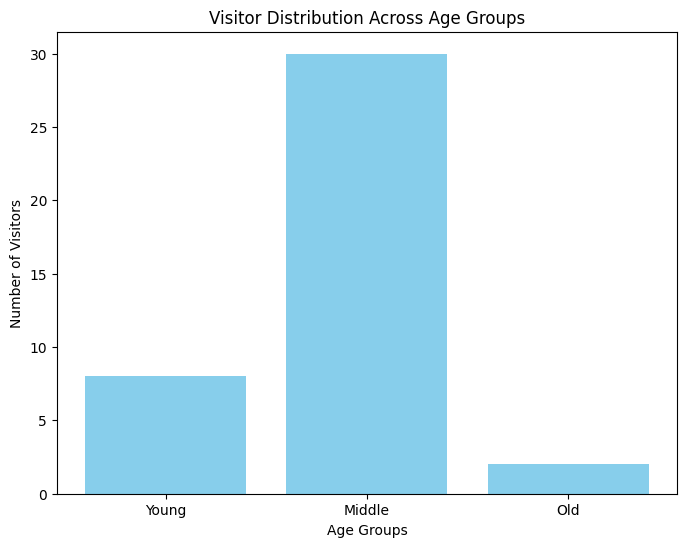

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(['Young','Middle','Old'], count, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Number of Visitors')
plt.title('Visitor Distribution Across Age Groups')
plt.show()

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('C:\\Users\\nivle\\Downloads\\clustervisitor.csv')

cluster={'Young':(df['Age']<=30),'Middle':((df['Age'])>30 & (df['Age']<=50)),'Old':(df['Age']>50)}

df1=df['Age']
df2=df['Income']
df3=pd.concat([df1,df2],axis=1)
s=StandardScaler()
newdf=s.fit_transform(df3)
K=KMeans(n_clusters=4,random_state=23)
df3['cluster']=K.fit_predict(newdf)
df3

,Age,Income,cluster
0,25,81000,0
1,40,44000,1
2,22,101000,0
3,55,90000,2
4,30,50000,1
5,45,112000,2
6,28,116000,0
7,50,104000,2
8,35,104000,0
9,48,117000,2


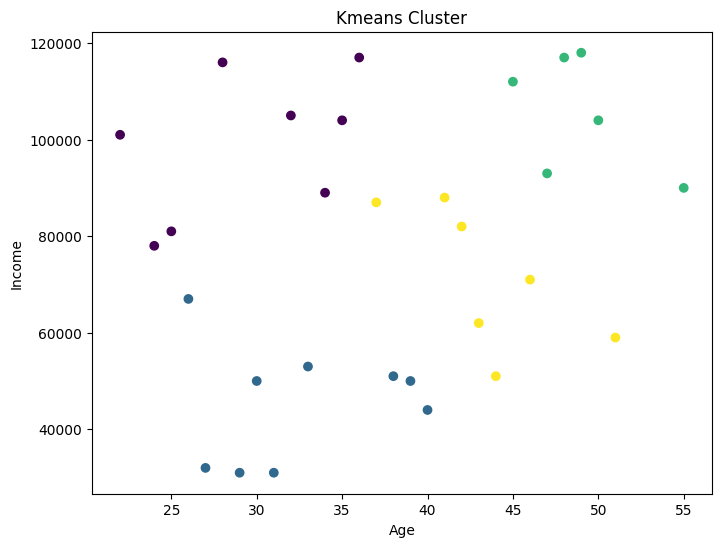

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=df3['Age'],y=df3['Income'],c= df3['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Kmeans Cluster')
plt.show()